In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Format Data

In [42]:
train_data = pd.read_csv("D:/Github/Bakery_sales_prediction_2025/bakery-sales-prediction-summer-2025-Dataset/train.csv")
train_data = train_data.rename(columns={
    "id": "ID",
    "Datum": "Date",
    "Warengruppe": "Product_Category",
    "Umsatz": "Sales_EUR"
})

weather_data = pd.read_csv("D:/Github/Bakery_sales_prediction_2025/bakery-sales-prediction-summer-2025-Dataset/wetter.csv")

weather_data = weather_data.rename(columns={
    "Datum": "Date",
    "Bewoelkung": "Cloud_Coverage",
    "Temperatur": "Temperature_C",
    "Windgeschwindigkeit": "Wind_Speed_mps",
    "Wettercode": "Weather_Code"
})


## Overview of the Dataset
- First cell: Train.csv
- Second cell: wetter.csv
- Third cell: test.csv

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10460\960163847.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Product_Category', y='Sales_EUR', data=train_data,palette='viridis')


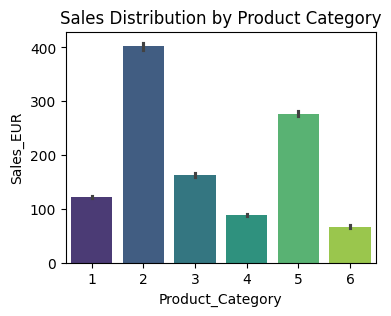

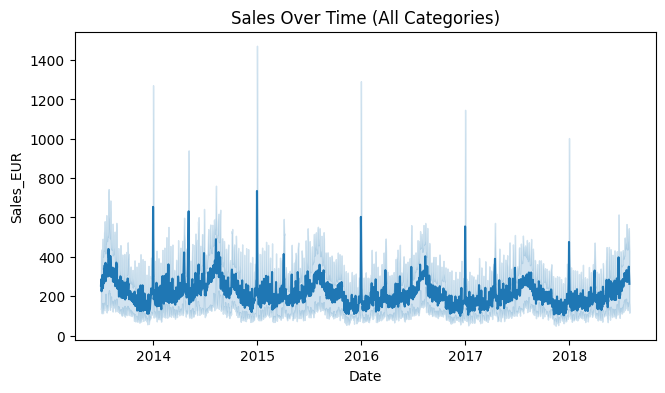

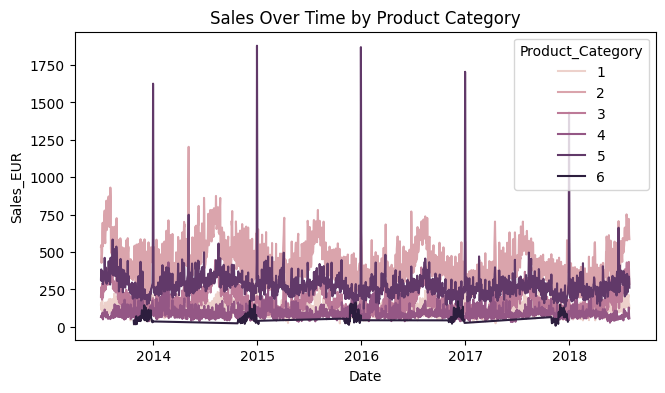

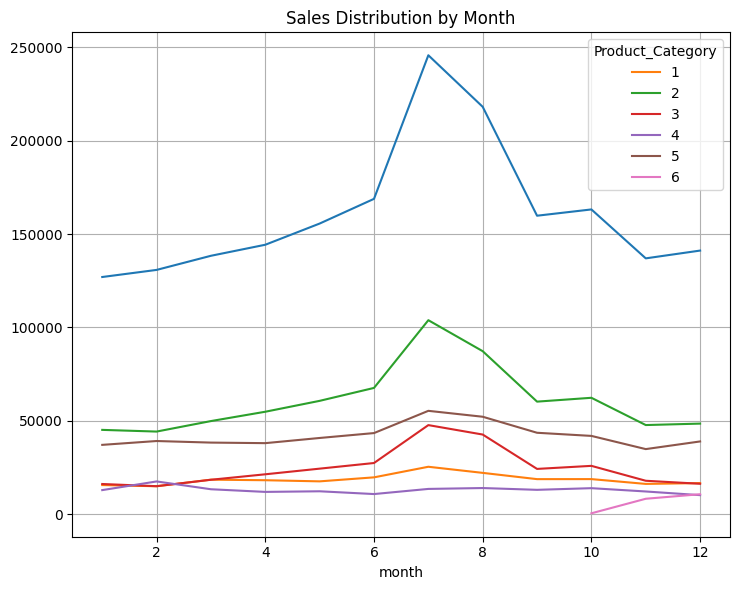

In [62]:
# Barplot sales by product category 

plt.figure(figsize=(4,3))
ax = sns.barplot(x='Product_Category', y='Sales_EUR', data=train_data,palette='viridis')
plt.title('Sales Distribution by Product Category')
plt.show()

# Line plot sales by date (all categories)
train_data['Date'] = pd.to_datetime(train_data['Date'])
plt.figure(figsize=(7.5,4))
sns.lineplot(x='Date', y='Sales_EUR', data=train_data)
plt.title('Sales Over Time (All Categories)')
plt.show()

# Line plot sales by product category
plt.figure(figsize=(7.5,4))
sns.lineplot(x='Date', y='Sales_EUR', hue='Product_Category', data=train_data)
plt.title('Sales Over Time by Product Category')
plt.show()

# line plot sales by month and product category by month

train_data['month'] = train_data['Date'].dt.month
train_data.groupby('month')['Sales_EUR'].sum().plot(kind='line', figsize=(7.5,6))
train_data.groupby(['month','Product_Category'])['Sales_EUR'].sum().unstack().plot(kind='line', figsize=(7.5,6),ax=plt.gca())
plt.title('Sales Distribution by Month')
plt.grid(True)
plt.tight_layout()
plt.show()

                                Date  Cloud_Coverage  Temperature_C  \
count                           2591     2591.000000    2591.000000   
mean   2015-12-04 07:31:50.459282176        4.805866      12.109691   
min              2012-01-01 00:00:00        0.000000     -10.250000   
25%              2014-03-11 12:00:00        3.000000       6.500000   
50%              2015-12-19 00:00:00        6.000000      12.000000   
75%              2017-09-27 12:00:00        7.000000      17.856250   
max              2019-08-01 00:00:00        8.000000      32.671428   
std                              NaN        2.578299       7.185550   

       Wind_Speed_mps  Weather_Code        month  
count     2591.000000   2591.000000  2591.000000  
mean        11.201853     43.465457     6.411810  
min          3.000000      0.000000     1.000000  
25%          8.000000     21.000000     4.000000  
50%         10.000000     61.000000     6.000000  
75%         14.000000     61.000000     9.000000  
max

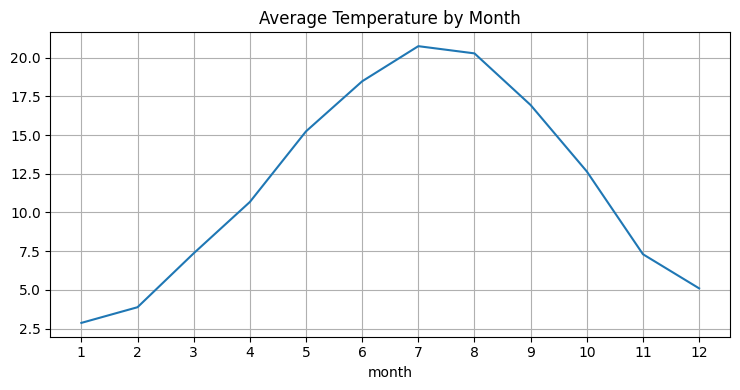

In [79]:
# Describe Statistics
print(weather_data.describe())

# Checking missing values
print(weather_data.isnull().sum())
## There are 10 missing values in Cloud_Coverage -> drop these rows
## There are 669 missing values in Weather_Code -> Choose the most frequent value

weather_data.dropna(subset='Cloud_Coverage', inplace=True)
weather_data.fillna(weather_data['Weather_Code'].mode()[0], inplace=True)


weather_data['Date'] = pd.to_datetime(weather_data['Date'])
weather_data['month'] = weather_data['Date'].dt.month
# Line plot weather data by month
weather_data.groupby('month')['Temperature_C'].mean().plot(kind='line', figsize=(7.5,4)).set_xticks(range(1,13))
plt.title('Average Temperature by Month')
plt.grid(True)
plt.tight_layout()
plt.show()